In [2]:
import pandas as pd
import numpy as np


In [3]:
df=pd.read_csv("HGI.csv")

In [4]:
df.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,...,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,...,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,...,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,Acute Care Hospitals,Voluntary non-profit - Private,...,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Above the national average,NaN,Not Available,Results are not available for this reporting p...
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,Acute Care Hospitals,Proprietary,...,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,Same as the national average,NaN,Above the national average,NaN,Not Available,Results are not available for this reporting p...


chek information of dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 28 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Provider ID                                                    4812 non-null   int64 
 1   Hospital Name                                                  4812 non-null   object
 2   Address                                                        4812 non-null   object
 3   City                                                           4812 non-null   object
 4   State                                                          4812 non-null   object
 5   ZIP Code                                                       4812 non-null   int64 
 6   County Name                                                    4797 non-null   object
 7   Phone Number                                                   4812 n

check count missing value 

In [6]:
df.isna().sum()

Provider ID                                                         0
Hospital Name                                                       0
Address                                                             0
City                                                                0
State                                                               0
ZIP Code                                                            0
County Name                                                        15
Phone Number                                                        0
Hospital Type                                                       0
Hospital Ownership                                                  0
Emergency Services                                                  0
Meets criteria for meaningful use of EHRs                         143
Hospital overall rating                                             0
Hospital overall rating footnote                                 3414
Mortality national c

droping all colomn where there is lot of missing value

In [7]:

df=df.drop(["Hospital overall rating footnote", "Mortality national comparison footnote", 
          "Safety of care national comparison footnote", "Readmission national comparison footnote",
         "Readmission national comparison footnote", "Patient experience national comparison footnote",
         "Effectiveness of care national comparison footnote", "Timeliness of care national comparison footnote",
         "Efficient use of medical imaging national comparison footnote"], axis=1)




In [8]:
df.isnull().sum()

Provider ID                                               0
Hospital Name                                             0
Address                                                   0
City                                                      0
State                                                     0
ZIP Code                                                  0
County Name                                              15
Phone Number                                              0
Hospital Type                                             0
Hospital Ownership                                        0
Emergency Services                                        0
Meets criteria for meaningful use of EHRs               143
Hospital overall rating                                   0
Mortality national comparison                             0
Safety of care national comparison                        0
Readmission national comparison                           0
Patient experience national comparison  

In [9]:
df["Meets criteria for meaningful use of EHRs"].value_counts()

Y                4668
Not Available       1
Name: Meets criteria for meaningful use of EHRs, dtype: int64

In [10]:
df = df.dropna()
df.isnull().sum()

Provider ID                                             0
Hospital Name                                           0
Address                                                 0
City                                                    0
State                                                   0
ZIP Code                                                0
County Name                                             0
Phone Number                                            0
Hospital Type                                           0
Hospital Ownership                                      0
Emergency Services                                      0
Meets criteria for meaningful use of EHRs               0
Hospital overall rating                                 0
Mortality national comparison                           0
Safety of care national comparison                      0
Readmission national comparison                         0
Patient experience national comparison                  0
Effectiveness 

In [11]:
df.describe()

,Provider ID,ZIP Code,Phone Number
count,4655.000000,4655.000000,4.655000e+03
mean,266722.448335,53780.188614,5.849839e+09
std,154614.918602,26804.881596,2.328346e+09
min,10001.000000,603.000000,9.369338e+08
25%,140194.000000,32995.000000,4.017335e+09
50%,260011.000000,55066.000000,6.053844e+09
75%,390179.500000,75818.000000,7.877360e+09
max,670114.000000,99901.000000,9.898943e+09


In [12]:
df["Provider ID"].nunique()

4655

My dropping list now contains Provider ID, Phone Number, and Meets criteria for meaningful use of EHRs. Let's check county name if it is a useful feature

In [13]:
df["County Name"].value_counts()

LOS ANGELES    79
COOK           51
JEFFERSON      46
WASHINGTON     43
MONTGOMERY     41
               ..
YALOBUSHA       1
SHARKEY         1
BOLIVAR         1
LEFLORE         1
COMAL           1
Name: County Name, Length: 1547, dtype: int64

the country name hase length ~=1500  we Planned to drop this feature. ZIP code counts below shows length of ~4000, which is also not feasible to keep. My dropping list now contains ZIP code, county name, provider ID, phone numbers, and EHRs

In [14]:
df = df.drop(["County Name", "ZIP Code", "Meets criteria for meaningful use of EHRs", 
                  "Provider ID", "Phone Number"], axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4655 entries, 0 to 4803
Data columns (total 15 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   Hospital Name                                         4655 non-null   object
 1   Address                                               4655 non-null   object
 2   City                                                  4655 non-null   object
 3   State                                                 4655 non-null   object
 4   Hospital Type                                         4655 non-null   object
 5   Hospital Ownership                                    4655 non-null   object
 6   Emergency Services                                    4655 non-null   object
 7   Hospital overall rating                               4655 non-null   object
 8   Mortality national comparison                         4655 non-null 

droping Hospital Name and Address,i dont think is useful in project 


In [16]:
df= df.drop(["Address", "Hospital Name"], axis=1)

In [17]:
df["Hospital Type"].value_counts()

Acute Care Hospitals         3256
Critical Access Hospitals    1308
Childrens                      91
Name: Hospital Type, dtype: int64

The majority of the hospitals  are acute care hospitals, followed by critical access, and children.

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Hospital Type', ylabel='count'>

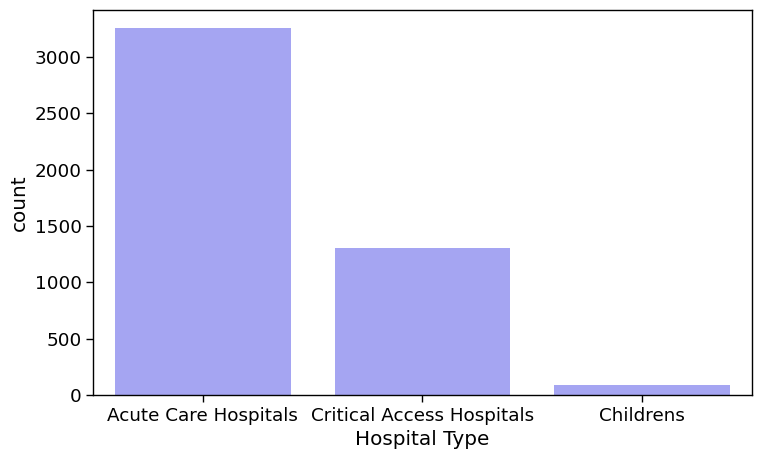

In [19]:
plt.figure(figsize=(8.5,5))
sns.set_context("paper", font_scale=1.5)
sns.countplot(x=df["Hospital Type"], data=df, color="blue", alpha=0.4)

In [20]:
df["Emergency Services"].value_counts()

Yes    4398
No      257
Name: Emergency Services, dtype: int64

The majority of the acute care hospitals and critical access have some sort of Emergency Services, unlike children's hospital. This makes sense as children's hospital is a specialty, usually affiliated with large acute care hospital in health systems

<Axes: xlabel='Hospital Type', ylabel='count'>

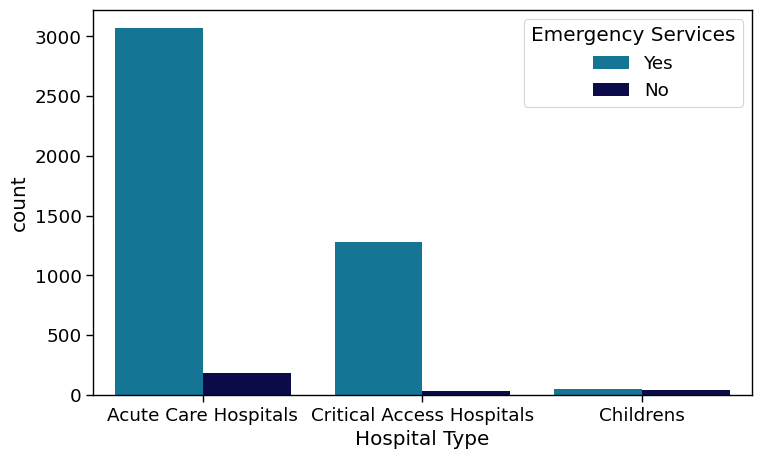

In [21]:
plt.figure(figsize=(8.5,5))
sns.countplot(x="Hospital Type", data=df, hue="Emergency Services", palette="ocean_r")

<Axes: xlabel='Emergency Services', ylabel='count'>

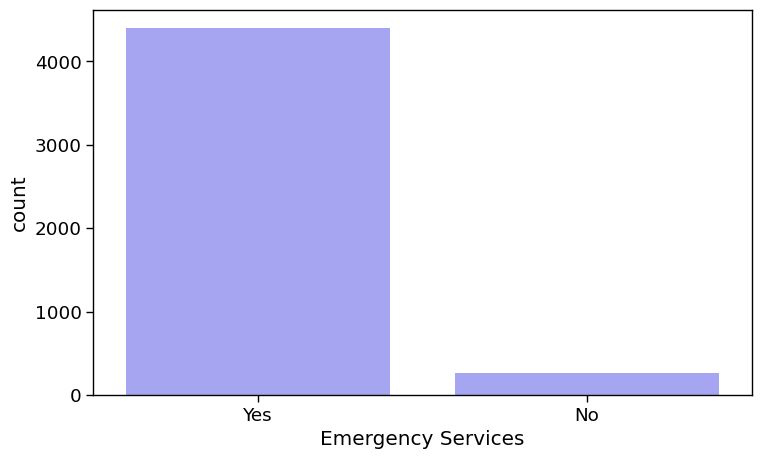

In [22]:
plt.figure(figsize=(8.5,5))
sns.set_context("paper", font_scale=1.5)
sns.countplot(x="Emergency Services", data=df, color="blue", alpha=0.4)

In [23]:
df["Hospital Ownership"].value_counts()

Voluntary non-profit - Private                 2003
Proprietary                                     753
Government - Hospital District or Authority     544
Voluntary non-profit - Other                    456
Government - Local                              392
Voluntary non-profit - Church                   341
Government - State                               60
Physician                                        55
Government - Federal                             42
Tribal                                            9
Name: Hospital Ownership, dtype: int64

The majority of the hospitals  is private non-profit, government and faith-based. This is followed by physician-owned hospitals and tribal-owned bottoms the list. It is probably due to the total population of the tribes is relatively low compared to the non-tribes. The supply and demand laws in healthcare applies here.

<Axes: xlabel='count', ylabel='Hospital Ownership'>

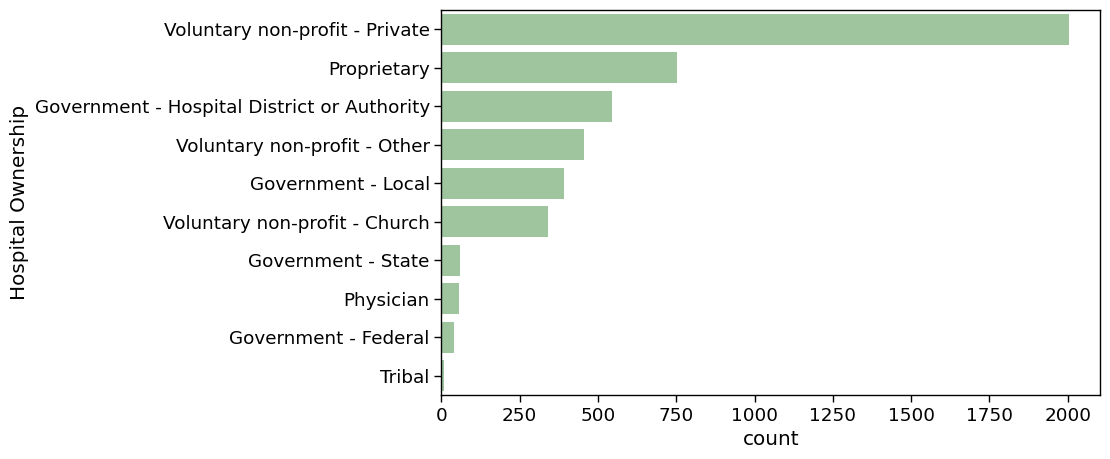

In [24]:
plt.figure(figsize=(8.5,5))
sns.set_context("paper", font_scale=1.5)
order = df["Hospital Ownership"].value_counts().sort_values(ascending=False).index
sns.countplot(y="Hospital Ownership", data=df, color="green", alpha=0.4, order=order)

In [25]:
df["Hospital overall rating"].value_counts()

3                1751
Not Available    1113
4                 931
2                 672
1                 107
5                  81
Name: Hospital overall rating, dtype: int64

In [26]:
df = df.drop(df[df["Hospital overall rating"] == "Not Available"].index)

<Axes: xlabel='Hospital overall rating', ylabel='count'>

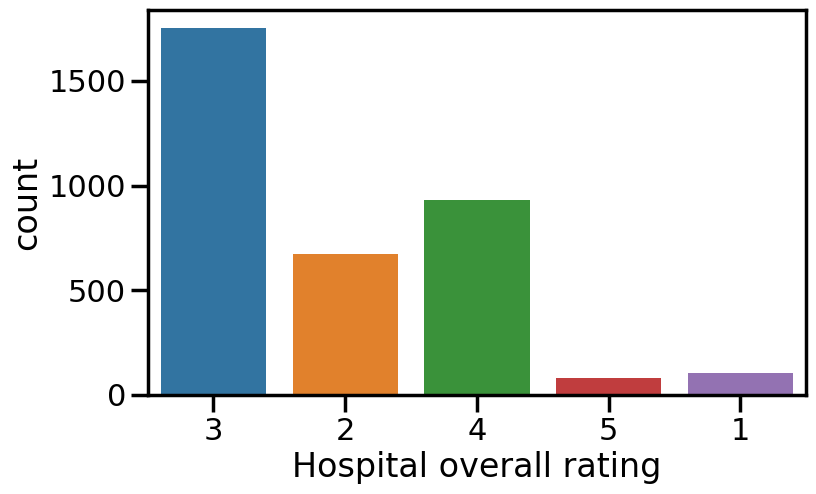

In [27]:
plt.figure(figsize=(8.5,5))
sns.set_context("poster", font_scale=1)
sns.countplot(x=df["Hospital overall rating"])

will drop Not Available counts in all features

In [28]:
df["Mortality national comparison"].value_counts()

Same as the national average    2575
Above the national average       400
Below the national average       340
Not Available                    227
Name: Mortality national comparison, dtype: int64

In [29]:
df = df.drop(df[df["Mortality national comparison"] == "Not Available"].index)

<Axes: xlabel='Mortality national comparison', ylabel='count'>

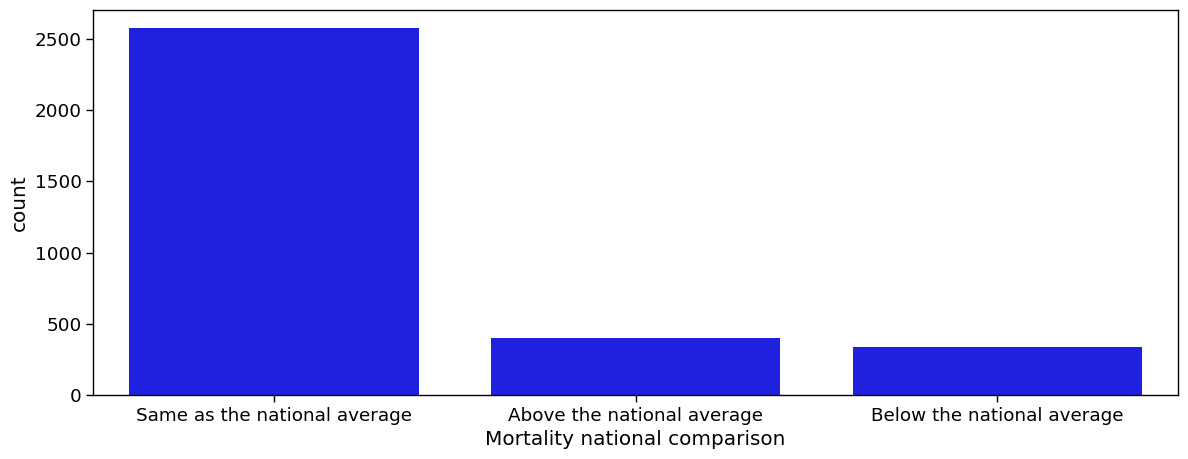

In [30]:
plt.figure(figsize=(14,5))
sns.set_context("paper", font_scale=1.5)
mortality_order = df["Mortality national comparison"].value_counts().sort_values(ascending=False).index
sns.countplot(x=df["Mortality national comparison"], color="blue", order=mortality_order)



In [31]:
df["Safety of care national comparison"].value_counts()

Same as the national average    1109
Not Available                    781
Above the national average       770
Below the national average       655
Name: Safety of care national comparison, dtype: int64

In [32]:
df = df.drop(df[df["Safety of care national comparison"] == "Not Available"].index)

<Axes: xlabel='Safety of care national comparison', ylabel='count'>

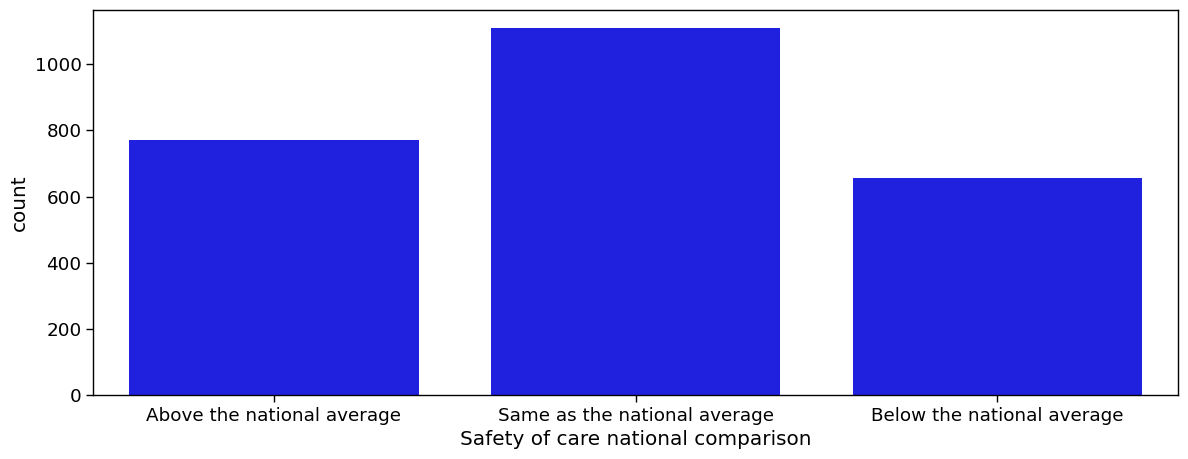

In [33]:
plt.figure(figsize=(14,5))
sns.countplot(x=df["Safety of care national comparison"], color="blue")

In [34]:
df["Readmission national comparison"].value_counts()

Same as the national average    961
Below the national average      807
Above the national average      766
Name: Readmission national comparison, dtype: int64

<Axes: xlabel='Readmission national comparison', ylabel='count'>

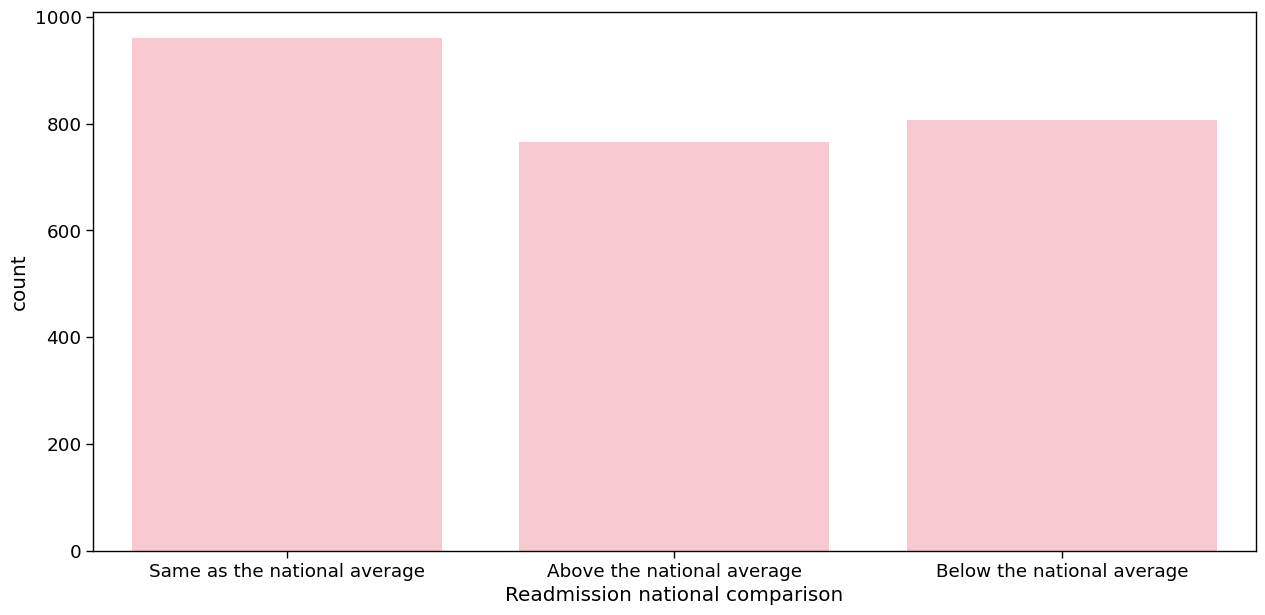

In [35]:
plt.figure(figsize=(15,7))
sns.countplot(x=df["Readmission national comparison"], color="pink")



In [36]:
df["Patient experience national comparison"].value_counts()

Below the national average      986
Same as the national average    837
Above the national average      703
Not Available                     8
Name: Patient experience national comparison, dtype: int64

In [37]:
df = df.drop(df[df["Patient experience national comparison"] == "Not Available"].index)

<Axes: xlabel='Patient experience national comparison', ylabel='count'>

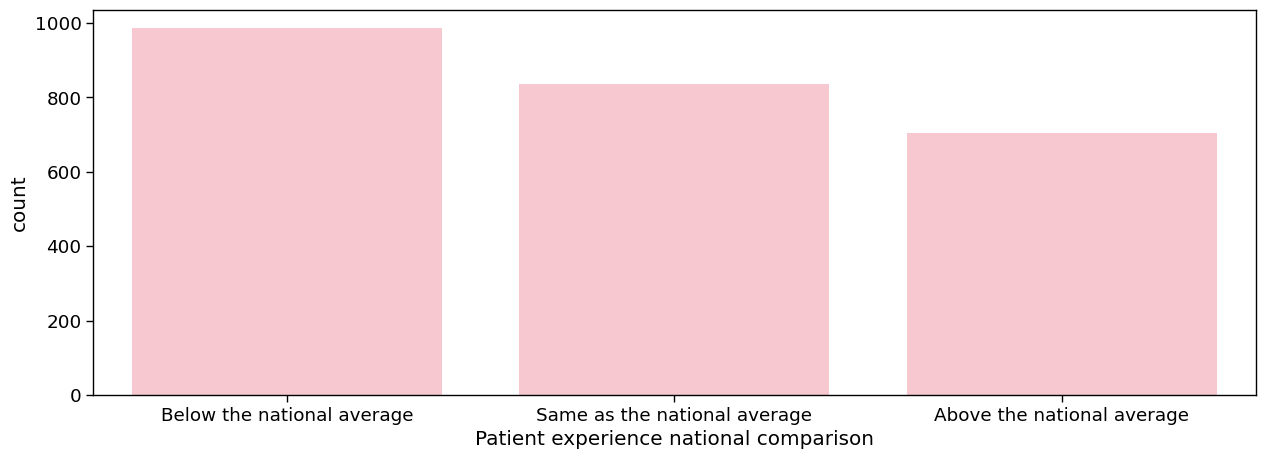

In [38]:
plt.figure(figsize=(15,5))
sns.countplot(x=df["Patient experience national comparison"], color="pink")

In [39]:
df["Effectiveness of care national comparison"].value_counts()

Same as the national average    2231
Below the national average       166
Above the national average       124
Not Available                      5
Name: Effectiveness of care national comparison, dtype: int64

In [40]:
df = df.drop(df[df["Effectiveness of care national comparison"] == "Not Available"].index)

<Axes: xlabel='Effectiveness of care national comparison', ylabel='count'>

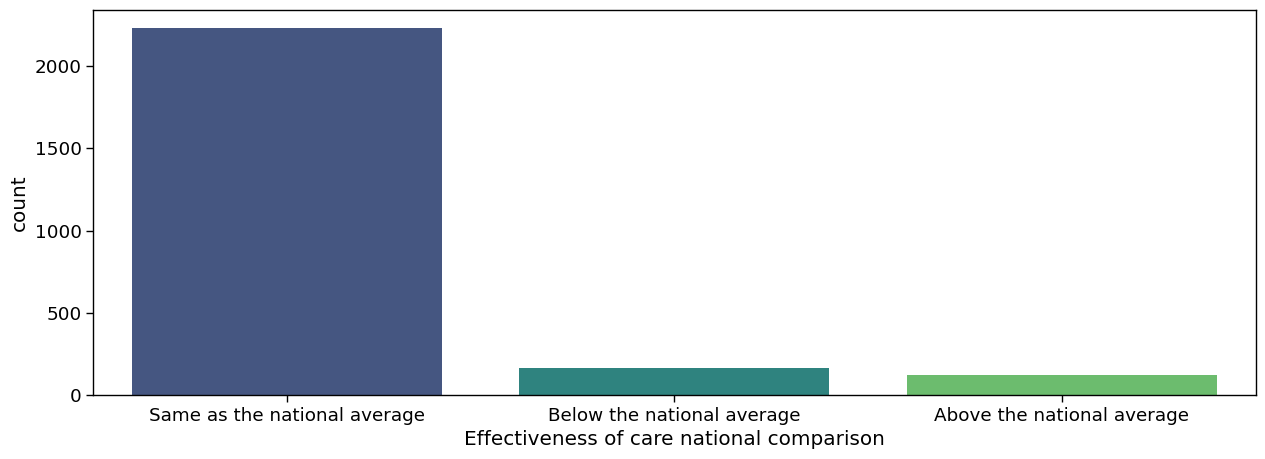

In [41]:
plt.figure(figsize=(15,5))
sns.countplot(x=df["Effectiveness of care national comparison"], palette="viridis")



In [42]:
df["Timeliness of care national comparison"].value_counts()

Same as the national average    1033
Below the national average       872
Above the national average       604
Not Available                     12
Name: Timeliness of care national comparison, dtype: int64

In [43]:
df= df.drop(df[df["Timeliness of care national comparison"] == "Not Available"].index)

<Axes: xlabel='Timeliness of care national comparison', ylabel='count'>

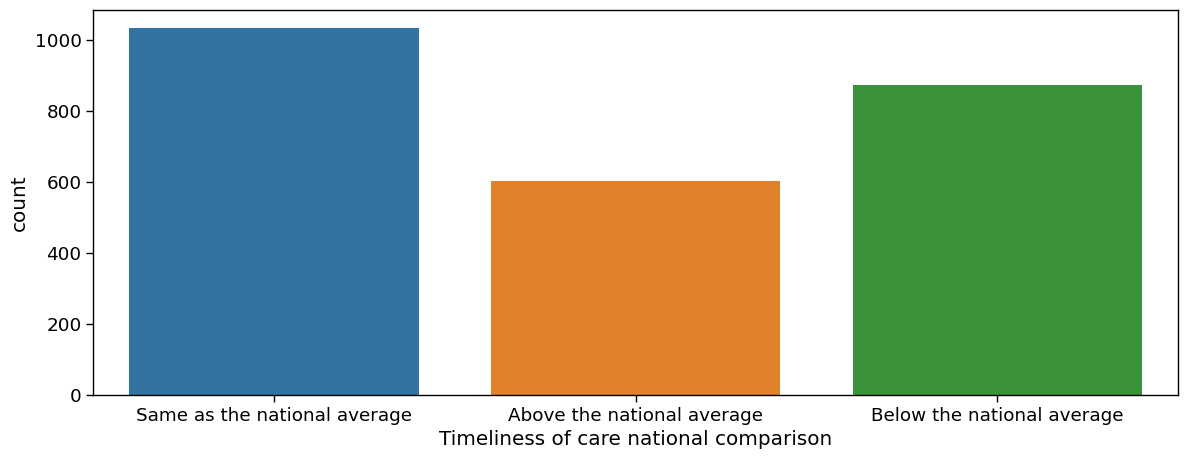

In [44]:
plt.figure(figsize=(14,5))
sns.countplot(x=df["Timeliness of care national comparison"])

In [45]:
df["Efficient use of medical imaging national comparison"].value_counts()

Same as the national average    1635
Above the national average       356
Below the national average       306
Not Available                    212
Name: Efficient use of medical imaging national comparison, dtype: int64

In [46]:
df = df.drop(df[df["Efficient use of medical imaging national comparison"] == "Not Available"].index)

<Axes: xlabel='Efficient use of medical imaging national comparison', ylabel='count'>

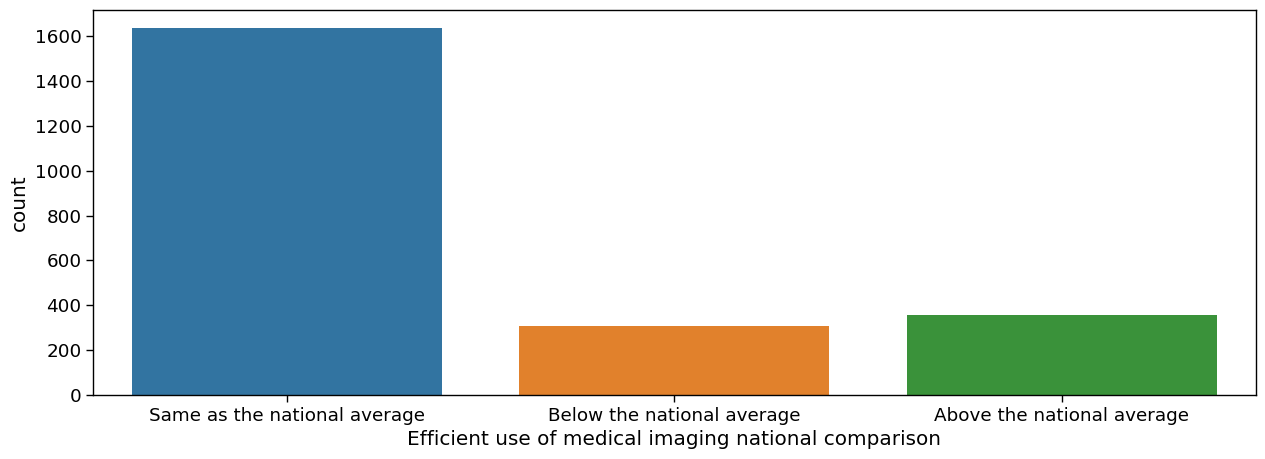

In [47]:
plt.figure(figsize=(15,5))
sns.countplot(x=df["Efficient use of medical imaging national comparison"])

In [48]:
df["City"].value_counts()

CHICAGO            18
HOUSTON            13
PHILADELPHIA       12
COLUMBUS           10
WASHINGTON         10
                   ..
BOAZ                1
LAPEER              1
STANFORD            1
GRAND BLANC         1
COLLEGE STATION     1
Name: City, Length: 1474, dtype: int64

the lenght of city data is ~=1500 and  is not necessary as we have State as the location will drop city

In [49]:
df = df.drop("City", axis=1)

Text(0.5, 0, 'Number of Hospitals')

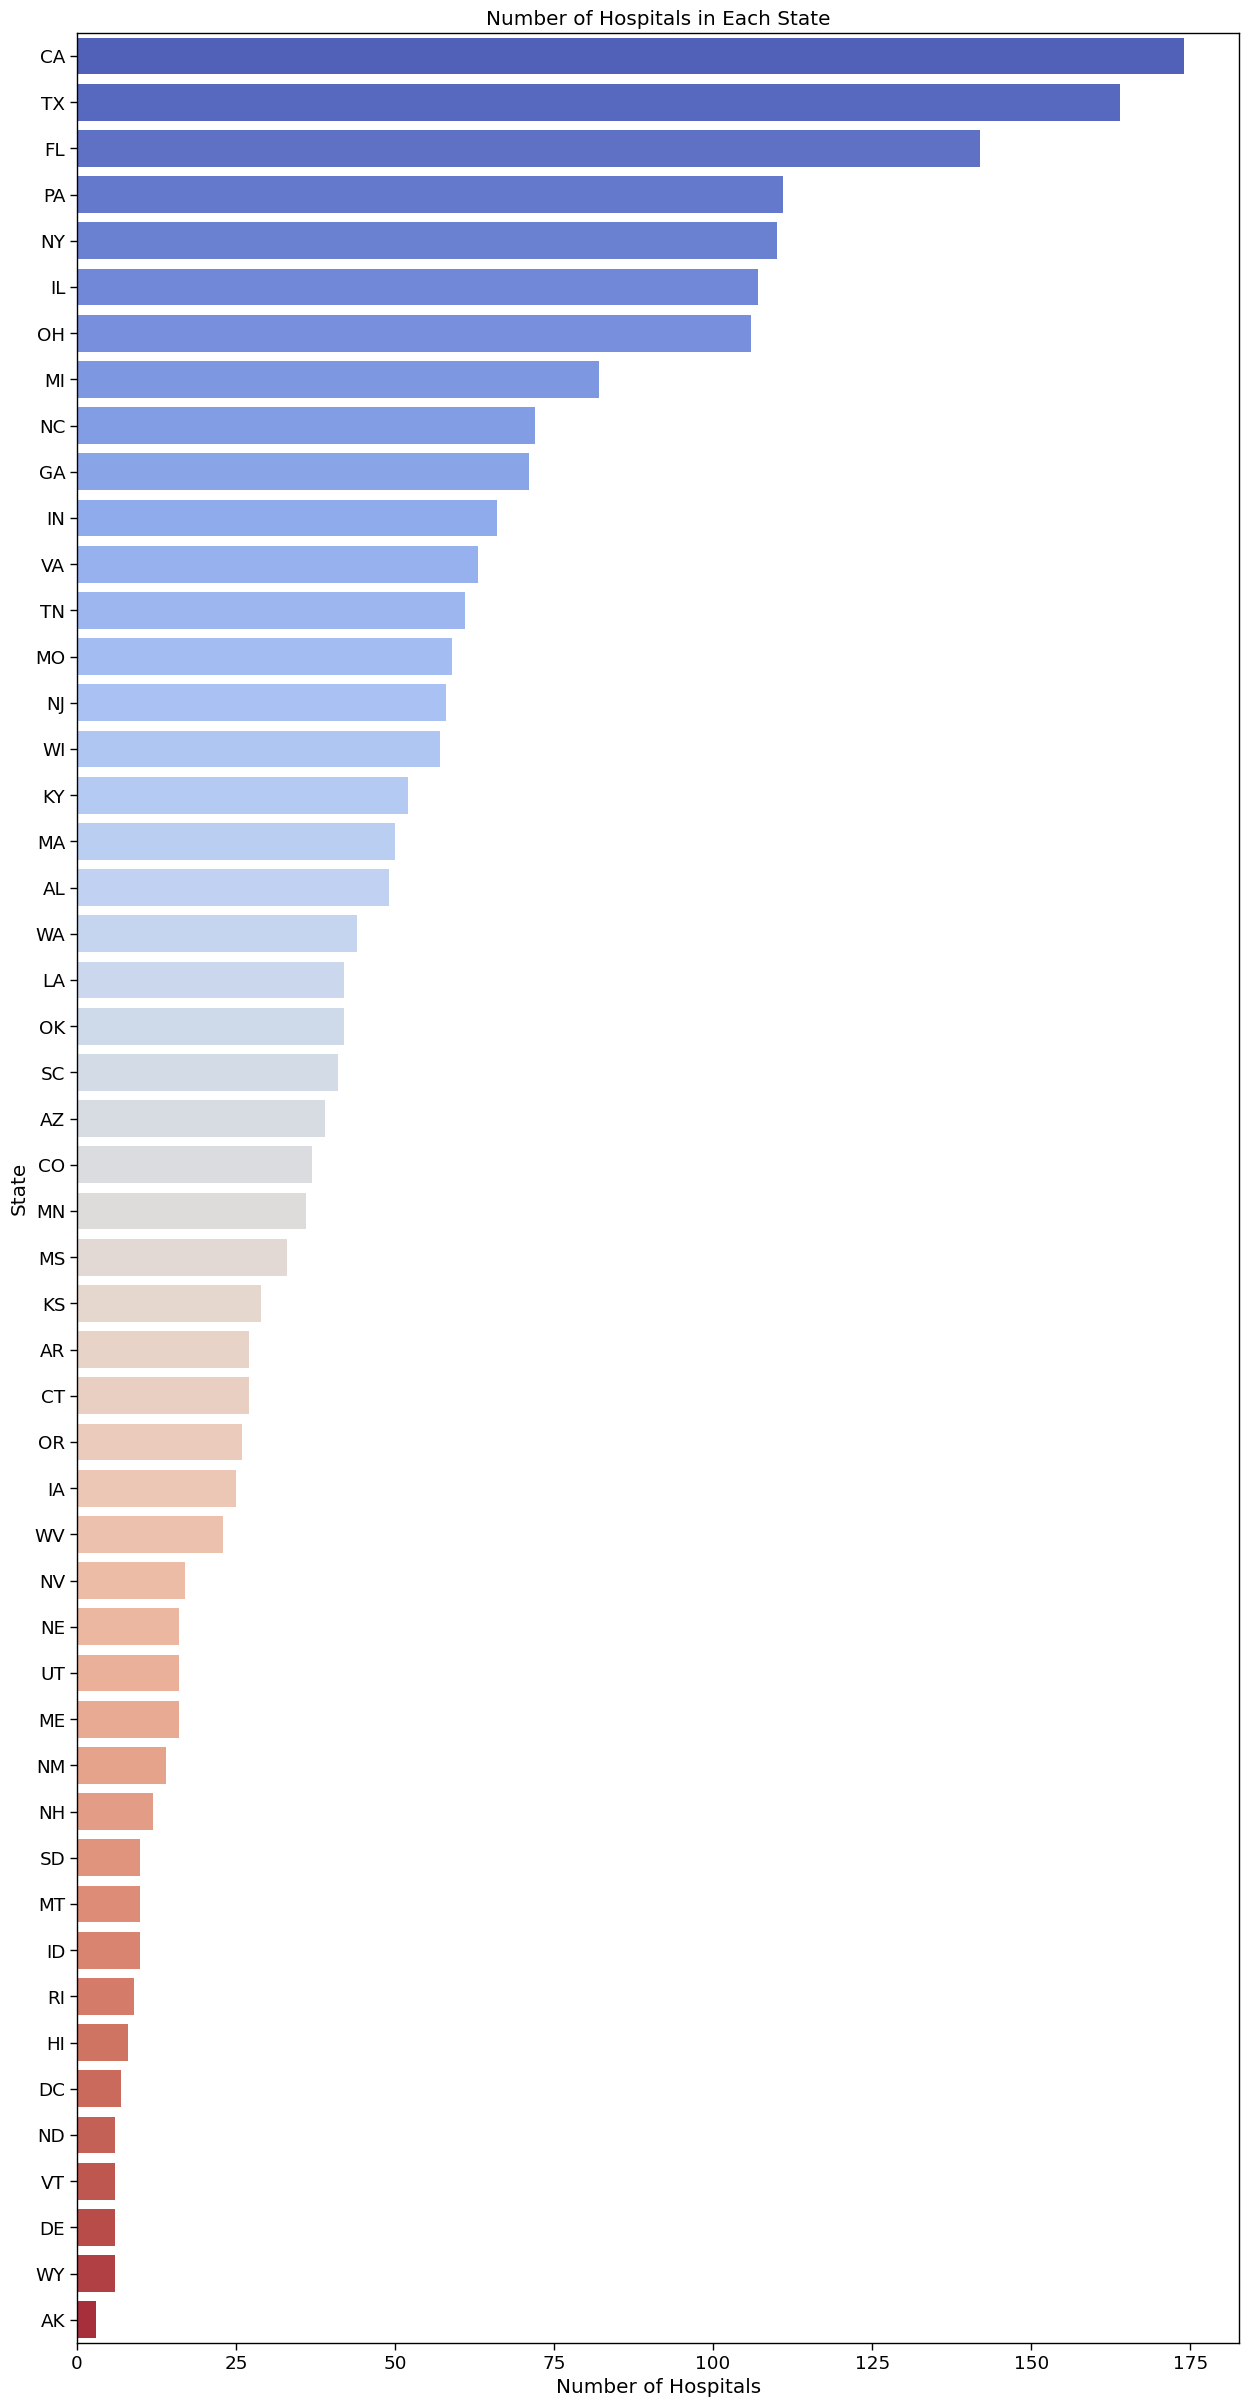

In [50]:
plt.figure(figsize=(15,30))
state_order = df["State"].value_counts().sort_values(ascending=False).index
sns.countplot(y=df["State"], palette="coolwarm", order=state_order)
plt.title("Number of Hospitals in Each State")
plt.xlabel("Number of Hospitals")


Looks like the top 3 states that have the highest number of hospitals are CA, TX, and FL,we dont have more info to know why !!

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 4784
Data columns (total 12 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   State                                                 2297 non-null   object
 1   Hospital Type                                         2297 non-null   object
 2   Hospital Ownership                                    2297 non-null   object
 3   Emergency Services                                    2297 non-null   object
 4   Hospital overall rating                               2297 non-null   object
 5   Mortality national comparison                         2297 non-null   object
 6   Safety of care national comparison                    2297 non-null   object
 7   Readmission national comparison                       2297 non-null   object
 8   Patient experience national comparison                2297 non-null 